### Importing Libraries


In [625]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100) # Displaying all columns
pd.set_option('display.max_colwidth', 100)
# For adding missing values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,  MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Read Data

In [626]:
df=pd.read_csv('kidneyChronic.csv')

In [627]:
print("Input Data columns:", df.columns)

Input Data columns: Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'class'],
      dtype='object')


In [628]:
#Replacing column names wbcc and rbcc as per given data set reference.
df = df.rename(columns={"wbcc":"wc"})
df = df.rename(columns={"rbcc":"rc"})

In [629]:
df.shape

(400, 25)

In [630]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,36,1.2,?,?,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,18,0.8,?,?,11.3,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,53,1.8,?,?,9.6,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,26,1.4,?,?,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [631]:
df.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,49,0.5,150,4.9,15.7,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,31,1.2,141,3.5,16.5,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,26,0.6,137,4.4,15.8,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,50,1,135,4.9,14.2,51,7200,5.9,no,no,no,good,no,no,notckd
399,58,80,1.025,0,0,normal,normal,notpresent,notpresent,131,18,1.1,141,3.5,15.8,53,6800,6.1,no,no,no,good,no,no,notckd


In [632]:
# 11 columns
numerical_attributes = ['age', 'bp',  'bgr', 'bu','sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'] 
 # 14 columns
nominal_attributes = ['sg','al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad','appet', 'pe', 'ane', 'class'] 

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     400 non-null    object
 16  wc      400 non-null    object
 17  rc      400 non-null    object
 18  htn     400 non-null    object
 19  dm      400 non-null    object
 20  cad     400 non-null    object
 21  appet   400 non-null    object
 22  pe      400 non-null    ob

In [634]:
df.replace(['?', '?\t', '\t?'], np.nan, inplace=True)

In [635]:
# convert  columns object to numeric
df[["age", "bp","sg", "al", "su","bgr", "bu",
       "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]] = df[["age", "bp","sg", "al", "su","bgr", "bu",
       "sc", "sod", "pot", "hemo", "pcv", "wc", "rc"]].apply(pd.to_numeric)

### Check for duplicate data

In [636]:
 df.duplicated().sum()

0

### check for missing values

<AxesSubplot:>

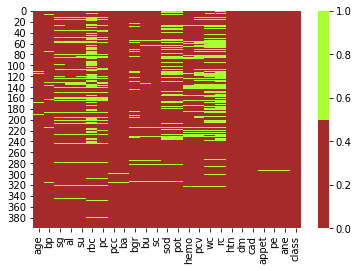

In [637]:
cols =df.columns
colours = ['#A52A2A','#AAFF32' ] # specify the colours - LIME is missing. BROWN is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [638]:
# calculating the % of missing data in each column.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 2%
bp - 3%
sg - 12%
al - 12%
su - 12%
rbc - 38%
pc - 16%
pcc - 1%
ba - 1%
bgr - 11%
bu - 5%
sc - 4%
sod - 22%
pot - 22%
hemo - 13%
pcv - 18%
wc - 26%
rc - 33%
htn - 0%
dm - 0%
cad - 0%
appet - 0%
pe - 0%
ane - 0%
class - 0%


#### Since We have missing values, we need to process for those missing values.

In [639]:
data_2=df.copy()

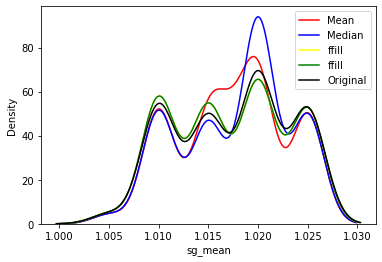

In [640]:
#sg column 
sg_mean = data_2.sg.mean()
sg_median = data_2.sg.median()
data_2['sg_mean'] = data_2.sg.fillna(sg_mean)
data_2['sg_median'] = data_2.sg.fillna(sg_median)
data_2['new_sg'] = data_2['sg'].fillna(method="ffill")
data_2['sg_new'] = data_2['sg'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['sg_mean'],color='red',label='Mean')
sns.kdeplot(data_2['sg_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_sg'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['sg_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['sg'],color='black',label='Original')
plt.legend()

In [641]:
#looking after all techniques in order to compensate for the missing values,third and fourth technique is the most suitable in the distribution 
df['sg']=data_2['new_sg']

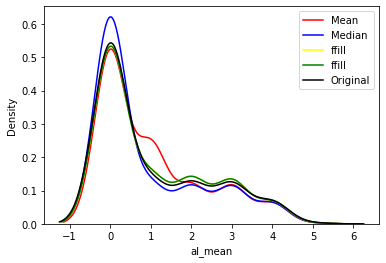

In [642]:
# al column
al_mean = data_2.al.mean()
al_median = data_2.al.median()
data_2['al_mean'] = data_2.al.fillna(al_mean)
data_2['al_median'] = data_2.al.fillna(al_median)
data_2['new_al'] = data_2['al'].fillna(method="ffill")
data_2['al_new'] = data_2['al'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['al_mean'],color='red',label='Mean')
sns.kdeplot(data_2['al_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_al'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['al_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['al'],color='black',label='Original')
plt.legend()

In [643]:
df['al']=data_2['new_al']

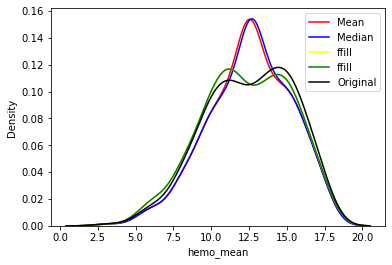

In [644]:
#hemo column
hemo_mean = data_2.hemo.mean()
hemo_median = data_2.hemo.median()
data_2['hemo_mean'] = data_2.hemo.fillna(hemo_mean)
data_2['hemo_median'] = data_2.hemo.fillna(hemo_median)
data_2['new_hemo'] = data_2['hemo'].fillna(method="ffill")
data_2['hemo_new'] = data_2['hemo'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['hemo_mean'],color='red',label='Mean')
sns.kdeplot(data_2['hemo_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_hemo'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['hemo_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['hemo'],color='black',label='Original')
plt.legend()

In [645]:
df['hemo']=data_2['hemo_new']

In [646]:
#pcv column
df['pcv'].isnull().sum()

71

In [647]:
df['pcv'].value_counts()

41.0    21
52.0    21
44.0    19
48.0    19
40.0    16
43.0    15
42.0    13
45.0    13
33.0    12
28.0    12
50.0    12
36.0    12
32.0    12
37.0    11
34.0    11
46.0     9
35.0     9
30.0     9
29.0     9
31.0     8
39.0     7
24.0     7
26.0     6
38.0     5
54.0     4
51.0     4
53.0     4
49.0     4
47.0     4
27.0     3
25.0     3
22.0     3
19.0     2
23.0     2
16.0     1
15.0     1
21.0     1
20.0     1
17.0     1
9.0      1
18.0     1
14.0     1
Name: pcv, dtype: int64

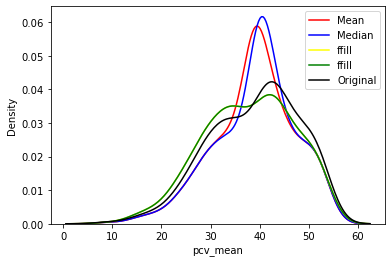

In [648]:
#column has an error in the data
pcv_mean = data_2.pcv.mean()
pcv_median = data_2.pcv.median()
data_2['pcv_mean'] = data_2.pcv.fillna(pcv_mean)
data_2['pcv_median'] = data_2.pcv.fillna(pcv_median)
data_2['new_pcv'] = data_2['pcv'].fillna(method="ffill")
data_2['pcv_new'] = data_2['pcv'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['pcv_mean'],color='red',label='Mean')
sns.kdeplot(data_2['pcv_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_pcv'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['pcv_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['pcv'],color='black',label='Original')
plt.legend()

In [649]:
df['pcv']=data_2['pcv_new']

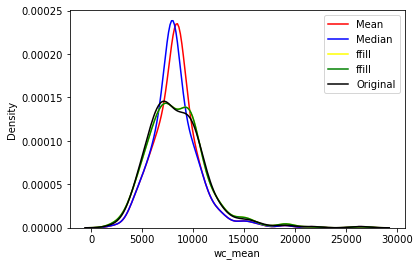

In [650]:
#wc column

wc_mean = data_2.wc.mean()
wc_median = data_2.wc.median()
data_2['wc_mean'] = data_2.wc.fillna(wc_mean)
data_2['wc_median'] = data_2.wc.fillna(wc_median)
data_2['new_wc'] = data_2['wc'].fillna(method="ffill")
data_2['wc_new'] = data_2['wc'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['wc_mean'],color='red',label='Mean')
sns.kdeplot(data_2['wc_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_wc'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['wc_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['wc'],color='black',label='Original')
plt.legend()

In [651]:
df['wc']=data_2['wc_new']

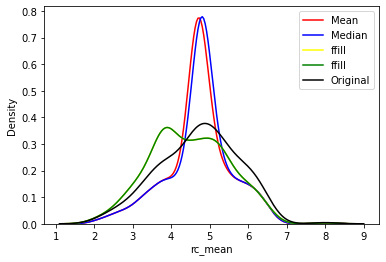

In [652]:
rc_mean = data_2.rc.mean()
rc_median = data_2.rc.median()
data_2['rc_mean'] = data_2.rc.fillna(rc_mean)
data_2['rc_median'] = data_2.rc.fillna(rc_median)
data_2['new_rc'] = data_2['rc'].fillna(method="ffill")
data_2['rc_new'] = data_2['rc'].fillna(method="ffill")
#Now let's draw the new columns
sns.kdeplot(data_2['rc_mean'],color='red',label='Mean')
sns.kdeplot(data_2['rc_median'],color='blue',label='Median')
sns.kdeplot(data_2['new_rc'] ,color='yellow',label='ffill')
sns.kdeplot(data_2['rc_new'] ,color='green',label='ffill')
sns.kdeplot(data_2['rc'],color='black',label='Original')
plt.legend()

In [653]:
df['rc']=data_2['rc_new']

In [654]:
#rbc column
df['rbc'].isnull().sum()

152

In [655]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

<AxesSubplot:>

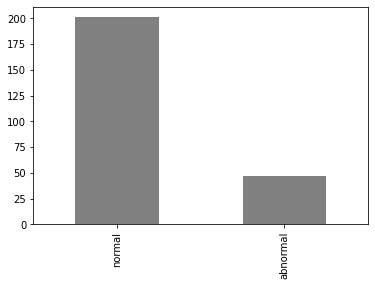

In [656]:
df['rbc'].value_counts().plot.bar(color='grey')

In [657]:
df['rbc'].fillna(method='ffill', inplace=True)

In [658]:
df['rbc'].isnull().sum()

2

In [659]:
df['rbc'].value_counts()

normal      289
abnormal    109
Name: rbc, dtype: int64

In [660]:
#pot column
data_2['pot']=df['pot']
pot_mean = data_2.pot.mean()
data_2['pot_mean'] = data_2.pot.fillna(pot_mean)

df['pot']=data_2['pot_mean']
print(df['pot'].isnull().sum())

0


In [661]:
#sod column
data_2['sod']=df['sod']
sod_mean = data_2.sod.mean()
data_2['sod_mean'] = data_2.sod.fillna(sod_mean)

df['sod']=data_2['sod_mean']
print(df['sod'].isnull().sum())

0


In [662]:
imp_nominal = SimpleImputer(strategy="most_frequent")
imp_numeric = SimpleImputer(missing_values=np.nan, strategy='mean')

df[nominal_attributes] = imp_nominal.fit_transform(df[nominal_attributes])
df[numerical_attributes] = imp_numeric.fit_transform(df[numerical_attributes])

In [663]:
# again checking for missing %
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

age - 0%
bp - 0%
sg - 0%
al - 0%
su - 0%
rbc - 0%
pc - 0%
pcc - 0%
ba - 0%
bgr - 0%
bu - 0%
sc - 0%
sod - 0%
pot - 0%
hemo - 0%
pcv - 0%
wc - 0%
rc - 0%
htn - 0%
dm - 0%
cad - 0%
appet - 0%
pe - 0%
ane - 0%
class - 0%


In [664]:
df['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

### Data balance check

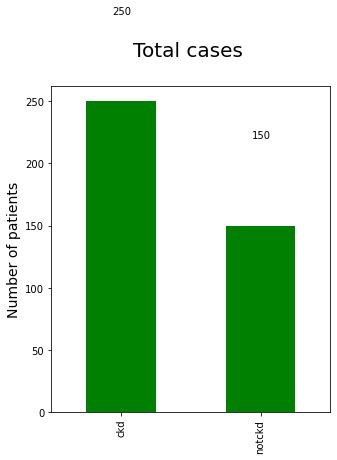

In [665]:
ax = df["class"].value_counts().plot(kind='bar', figsize=(5, 6), fontsize=10, color='green')
ax.set_title('Total cases ', size=20, pad=30)
ax.set_ylabel('Number of patients', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 70, str(round(i.get_height(), 2)), fontsize=10)

In [666]:
labelencoder = LabelEncoder()
df[nominal_attributes] = df[nominal_attributes].apply(labelencoder.fit_transform)
df = df.astype(float)

### checking for correlation 

Heatmap for correlation of the attributes:


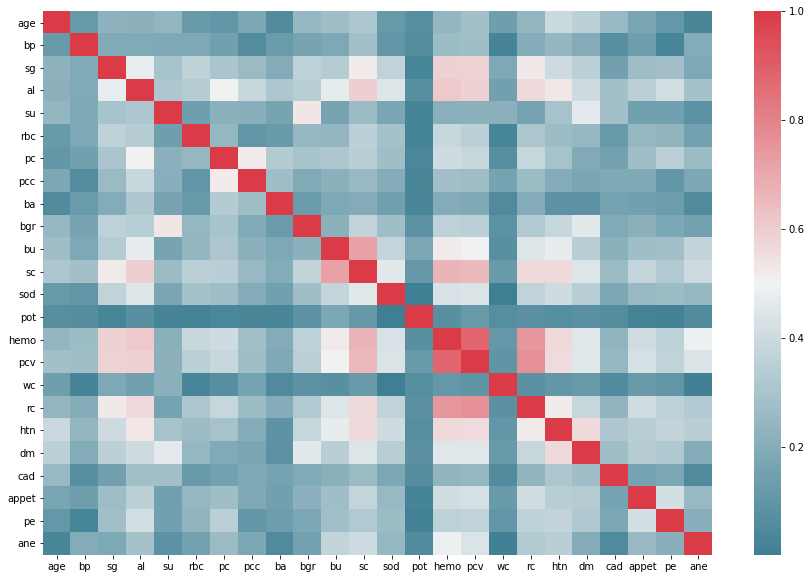

In [667]:
# Check if any of the attributes are corelated using the the heatmap
corr = df.iloc[:, 0:-1].astype(float).corr(method='spearman').abs()
print("Heatmap for correlation of the attributes:")
ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [668]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df = df.drop(columns=to_drop)

In [669]:
# Divide X and y based on the features and class attribute
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

# Split the training and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=2)

### Plotting the histogram for the attribute values


Histogram plots for the attributes:


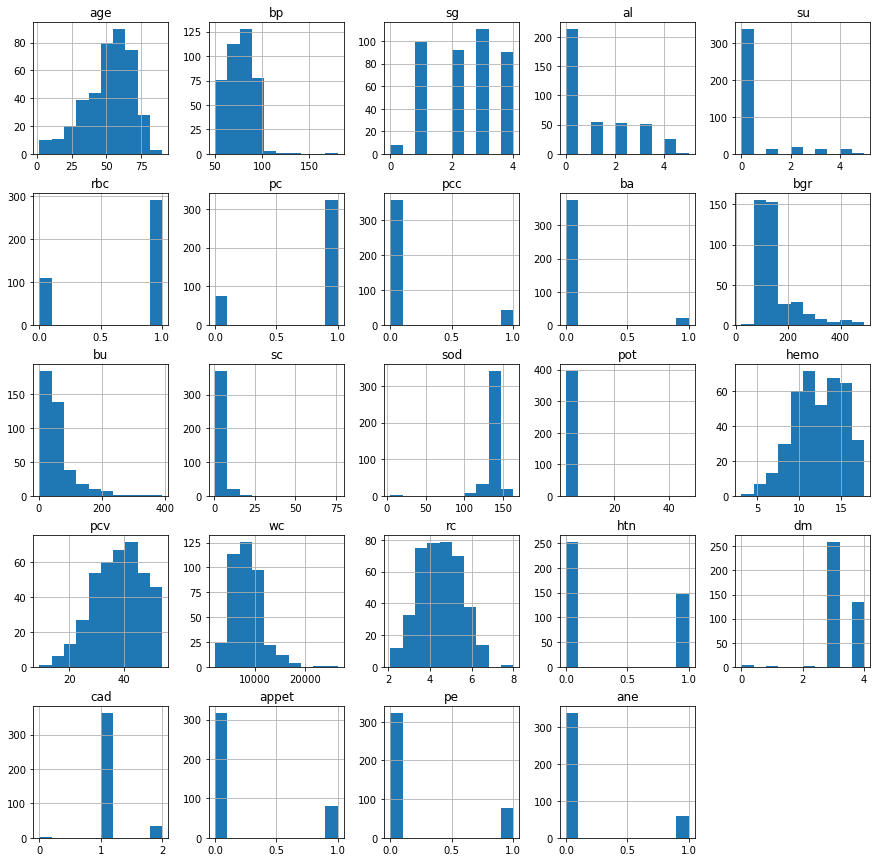

In [670]:
print("Histogram plots for the attributes:")
hist = X.hist(figsize=[15,15])
plt.show()

### minmax scale & checking for outliers

In [671]:
print("Statistics and box plot for the Numerical attributes:")
scaler = MinMaxScaler()
df[numerical_attributes] = scaler.fit_transform(df[numerical_attributes])
df.describe()

Statistics and box plot for the Numerical attributes:


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.562311,0.203608,2.440000,1.05750,0.395000,0.727500,0.810000,0.105000,0.055000,0.269309,0.143583,0.035350,0.839298,0.047803,0.628044,0.638889,0.258182,0.402203,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.375000
std,0.192897,0.103664,1.146598,1.34302,1.040038,0.445803,0.392792,0.306937,0.228266,0.159792,0.126536,0.074305,0.058071,0.063366,0.199022,0.202778,0.121965,0.171037,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.484729
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.454545,0.153846,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.168803,0.065469,0.006614,0.823344,0.033708,0.482993,0.488889,0.180785,0.288136,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.590909,0.217189,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.222222,0.109114,0.013228,0.839298,0.047803,0.632653,0.644444,0.239669,0.406780,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.704545,0.230769,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.273504,0.154685,0.035350,0.861199,0.051685,0.795918,0.783333,0.314050,0.525424,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000


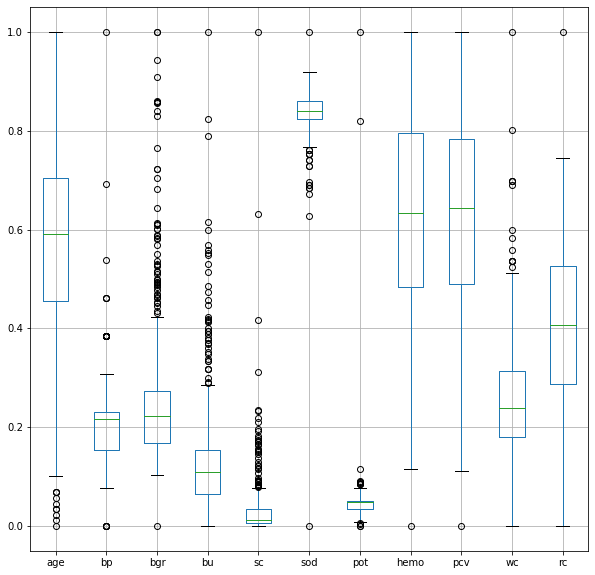

In [672]:
boxplot = df[numerical_attributes].astype(float).boxplot(figsize=[10,10])
plt.show()

### Build machine learning model

In [673]:
# Create Decision Tree classifer object
# function to classify and display the results 
def runClassifer(classifier, X_train, y_train, y_test):
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        print("Accuracy:",accuracy_score(y_test, y_pred))
        print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))
        print(classification_report(y_test, y_pred))
dtc = DecisionTreeClassifier(random_state=2)
print("Classifier used - Decision Tree Classifier :")
runClassifer(dtc,X_train,y_train,y_test)

Classifier used - Decision Tree Classifier :
Accuracy: 0.9772727272727273
Confusion matrix: 
 [[83  1]
 [ 2 46]]
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        84
         1.0       0.98      0.96      0.97        48

    accuracy                           0.98       132
   macro avg       0.98      0.97      0.98       132
weighted avg       0.98      0.98      0.98       132



In [674]:
# Create Gaussian Naive Bayes classifer object
gnb = GaussianNB()
print("Classifier used - Gaussian Naive Bayes :")
runClassifer(gnb,X_train,y_train,y_test)

Classifier used - Gaussian Naive Bayes :
Accuracy: 0.9772727272727273
Confusion matrix: 
 [[81  3]
 [ 0 48]]
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        84
         1.0       0.94      1.00      0.97        48

    accuracy                           0.98       132
   macro avg       0.97      0.98      0.98       132
weighted avg       0.98      0.98      0.98       132



In [675]:
# Create Gradient Boosting classifer object
gbc = GradientBoostingClassifier()
print("Classifier used - Gradient Boosting :")
runClassifer(gbc,X_train,y_train,y_test)

Classifier used - Gradient Boosting :
Accuracy: 0.9848484848484849
Confusion matrix: 
 [[82  2]
 [ 0 48]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        84
         1.0       0.96      1.00      0.98        48

    accuracy                           0.98       132
   macro avg       0.98      0.99      0.98       132
weighted avg       0.99      0.98      0.98       132



In [676]:
# Create SVM classifer object
svm = SVC(kernel='rbf',random_state=2)
print("Classifier used - SVM :")
runClassifer(svm,X_train,y_train,y_test)

Classifier used - SVM :
Accuracy: 0.6363636363636364
Confusion matrix: 
 [[84  0]
 [48  0]]
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78        84
         1.0       0.00      0.00      0.00        48

    accuracy                           0.64       132
   macro avg       0.32      0.50      0.39       132
weighted avg       0.40      0.64      0.49       132



#### among all the classifier object created Gradient Boosting works best with accuracy of 0.99 and false negative value as 0